<a href="https://colab.research.google.com/github/Emmanuel-Avogo/Immanuel-Chrysostom/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 SA

Hey Everyone!!
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [1]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [2]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [3]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Looking at the data

In [4]:
df["spam"].unique()
df["spam"].fillna(df["spam"].median(), inplace=True)

In [5]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.

In [6]:
# Separating the spam and non-spam emails
spam_emails = df[df['spam'] == 1]
non_spam_emails = df[df['spam'] == 0]

In [7]:
# Calculating the frequency of each word in spam emails
spam_word_frequency = spam_emails.iloc[:, 2:].sum()

# the frequency of each word in non-spam emails
non_spam_word_frequency = non_spam_emails.iloc[:, 2:].sum()

In [8]:
# the top 5 common words in spam emails
top_spam_words = spam_word_frequency.nlargest(5)

# the top 5 common words in non-spam emails
top_non_spam_words = non_spam_word_frequency.nlargest(5)

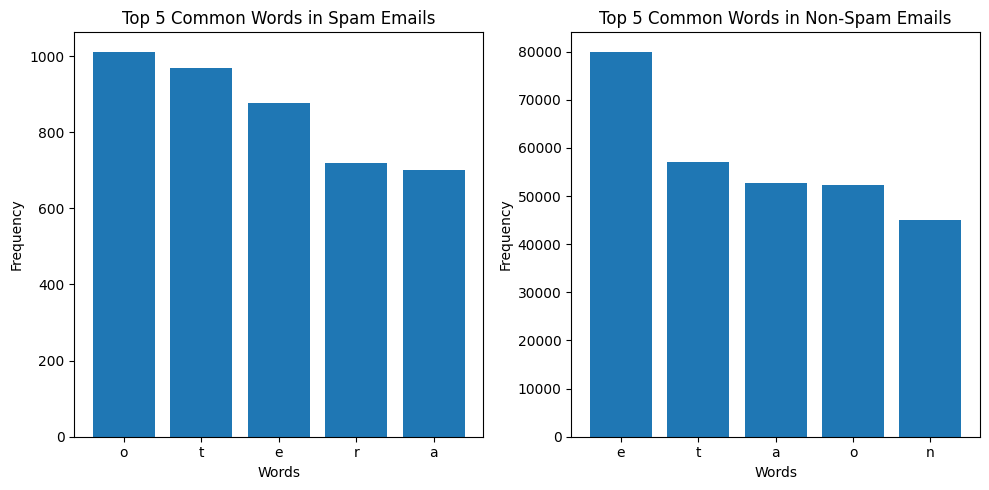

In [9]:
# Histogram plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(top_spam_words.index, top_spam_words.values)
plt.title("Top 5 Common Words in Spam Emails")
plt.xlabel("Words")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.bar(top_non_spam_words.index, top_non_spam_words.values)
plt.title("Top 5 Common Words in Non-Spam Emails")
plt.xlabel("Words")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## Figuring out some comparatively more important features

In [10]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset?
# Try taking only top 1.5K that will comprise of some of the most "deciding factors"

To reduce the number of columns in the dataset from 3K to the top 1.5K, we can use the variance thresholding approach since  the "spam" column represents the target variable, our assumed binary classification problem is (spam vs. non-spam).

In [11]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from sklearn.feature_selection import VarianceThreshold

In [13]:
# the features and target variable
X = df.iloc[:, 1:]
y = df["spam"]

variance_selector = VarianceThreshold(threshold=0.0)
X_reduced = variance_selector.fit_transform(X)
feature_variances = variance_selector.variances_

# Sorting the variances to get the indices of the top 1.5K features
selected_features_indices = feature_variances.argsort()[-1500:][::-1]
X_reduced = X.iloc[:, selected_features_indices]

print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (865, 3001)
Reduced shape: (865, 1500)


## Train - Test Split

In [14]:
# Create trianing and testing data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (692, 1500)
Testing data shape: (173, 1500)


## Making Predictions using Multinomial NB Classifier

In [18]:
# Feed the train data into multinomial naive bias classifier

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.impute import SimpleImputer

# the SimpleImputer will impute missing values with zeros
imputer = SimpleImputer(strategy='constant', fill_value=0)

X_train_imputed = imputer.fit_transform(X_train)
y_train_imputed = imputer.fit_transform(y_train.values.reshape(-1, 1)).ravel()

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_imputed, y_train_imputed)

MultinomialNB()

In [20]:
# we will use the trained classifier to make predictions on the testing data
y_pred = nb_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [21]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

In [22]:
# we will calculate the accuracy of the model by comparing the predicted labels (y_pred) with the actual labels (y_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


To plot the ROC curve and calculate the AUC score, we need to obtain the predicted probabilities of the positive class (spam).

In [24]:
y_pred_proba = nb_classifier.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [25]:
print("Original Class Distribution:")
print(df["spam"].value_counts())

Original Class Distribution:
0    857
1      7
2      1
Name: spam, dtype: int64


In [26]:
print("Training Class Distribution:")
print(y_train.value_counts())

print("Testing Class Distribution:")
print(y_test.value_counts())


Training Class Distribution:
0    685
1      6
2      1
Name: spam, dtype: int64
Testing Class Distribution:
0    172
1      1
Name: spam, dtype: int64


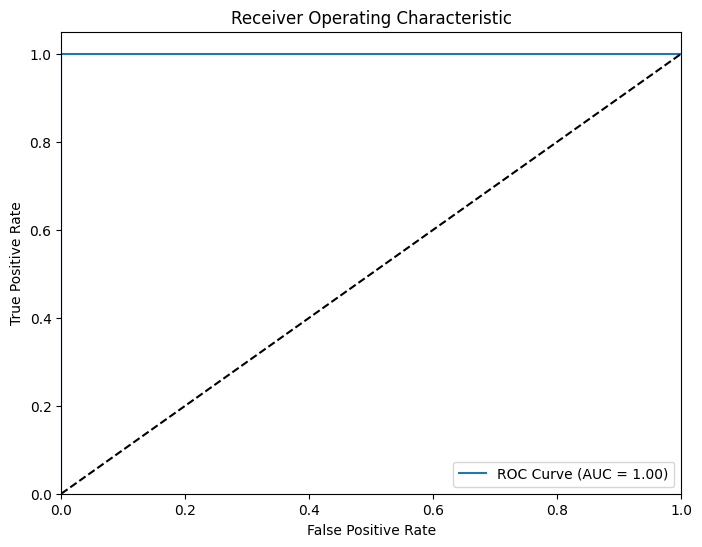

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc_score))
plt.plot([0, 1], [0, 1], "k--")
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

## Plot the confusion Matrix

In [28]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

# Selecting 5 words of my choice as features
selected_words = ['accepted', 'prompt', 'Prediction', 'database', 'model']

X = df[selected_words]
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in the training set
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)

# Train the classifier model
model = MultinomialNB()
model.fit(X_train_imputed, y_train)

X_test_imputed = imputer.transform(X_test)
y_pred = model.predict(X_test_imputed)


confusion_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[172   0]
 [  1   0]]


## Trying out with SVMs

In [37]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns

selected_words = ['accepted', 'prompt', 'Prediction', 'database', 'model']

X = df[selected_words]
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# the SVC model
model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred)

Accuracy: 0.9942196531791907


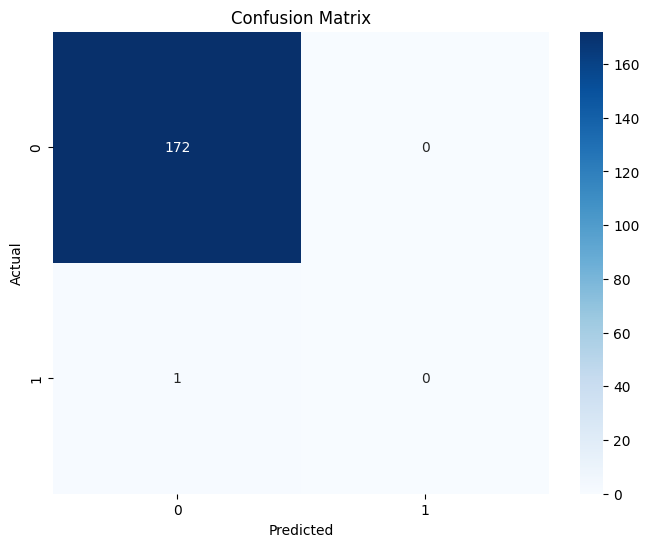

In [41]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Comparing the models

In [44]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?

Both the Multinomial Naive Bayes (MNB) model and the Support Vector Classifier (SVC) model have the same accuracy scores, it suggests that they perform similarly in terms of their ability to correctly classify the data.

## Bonus Question

In [45]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [46]:
s = "I am a Python developer and currently working on a project to classify mails"

# Tokenize
tokens = s.split()

# the frequency of each word
word_freq = {}
for word in tokens:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Creatting the dataframe
df = pd.DataFrame({"Word": word_freq.keys(), "Frequency": word_freq.values()})

print(df)


         Word  Frequency
0           I          1
1          am          1
2           a          2
3      Python          1
4   developer          1
5         and          1
6   currently          1
7     working          1
8          on          1
9     project          1
10         to          1
11   classify          1
12      mails          1
